**E-Commerce Sales Dataset**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df_1 = pd.read_csv("D:\\Kütüphane\\Python\\Atölye Proje\\basket_details.csv")

In [81]:
df_2 = pd.read_csv("D:\\Kütüphane\\Python\\Atölye Proje\\customer_details.csv")

In [58]:
print(df_1.shape)
print(df_2.shape)

(15000, 4)
(20000, 4)


In [45]:
df_1.head()

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2


In [46]:
df_2.head()

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88


In [60]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   15000 non-null  int64 
 1   product_id    15000 non-null  int64 
 2   basket_date   15000 non-null  object
 3   basket_count  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB


In [61]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   20000 non-null  int64  
 1   sex           20000 non-null  object 
 2   customer_age  20000 non-null  float64
 3   tenure        20000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 625.1+ KB


**EDA**

*Veri İncelemesi*

In [47]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   15000 non-null  int64 
 1   product_id    15000 non-null  int64 
 2   basket_date   15000 non-null  object
 3   basket_count  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB


In [48]:
df_1.describe()

,customer_id,product_id,basket_count
count,1.500000e+04,1.500000e+04,15000.000000
mean,1.808567e+07,3.269771e+07,2.153733
std,1.233000e+07,1.629455e+07,0.517929
min,4.784000e+03,4.939000e+04,2.000000
25%,8.659327e+06,3.137412e+07,2.000000
50%,1.520775e+07,3.694759e+07,2.000000
75%,2.663904e+07,4.502408e+07,2.000000
max,4.460824e+07,5.579097e+07,10.000000


*Eksik ve Bozuk Veri Tespiti*

In [88]:
"Garbage In, Garbage Out"

df_1.isnull().sum()

df_2.isnull().sum()

customer_id     0
sex             0
customer_age    0
tenure          0
dtype: int64

In [93]:
df_2["sex"].unique()

array(['Male', 'Female', 'kvkktalepsilindi', 'UNKNOWN'], dtype=object)

In [124]:
df_2 = df_2[~df_2["sex"].isin(["kvkktalepsilindi", "UNKNOWN"])]

In [126]:
df_2["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_2["customer_id"].unique()

In [95]:
df_2["customer_age"].unique()

array([  44.,   36.,   35.,   33.,   42.,   37.,   46.,   34.,   25.,
         38.,   24.,   28.,   40.,   41.,   29.,   39.,   31.,   43.,
        124.,   30.,   27.,   26.,   32.,  121.,   47.,   18.,   50.,
         48.,   55.,   54.,   45.,   53.,   49.,   58.,   72.,   75.,
        123.,   52.,   86.,   23.,   56.,   65.,   63.,   13.,   70.,
         21.,   66.,   51.,   77.,   62.,   71.,   68.,   19.,   12.,
         59.,   22.,   61.,   57.,   17.,   64.,   60.,  120.,   16.,
         67.,  117.,   20.,   76.,  118.,    5.,   69.,   91.,    3.,
        149.,  -34.,  122.,  119.,  103.,  112.,  116.,   99.,  101.,
        139.,  100.,   73.,   84.,   74.,    4.,  130.,   15., 2022.,
        115.,    6.,  127.])

*customer_age sütunu max ve min değerlerini seçelim bunların içinde olmayan tüm veriler çöp veridir*

In [99]:
print(df_2["customer_age"].min())
print(df_2["customer_age"].max())

-34.0
2022.0


In [114]:
Cleaning = df_2[(df_2["customer_age"] < 0) | (df_2["customer_age"] > 80)]
Cleaning

"6713 verinin yaşları yanlış"

,customer_id,sex,customer_age,tenure
42,10055269,Male,124.0,88
66,11009271,Male,121.0,71
204,12342673,Male,123.0,55
205,1053101,Male,123.0,127
206,12310053,Male,123.0,55
...,...,...,...,...
19974,12595723,Male,123.0,52
19978,12587505,Male,123.0,52
19979,12592223,Male,123.0,52
19980,12570607,Male,123.0,52


*Yanlış verileri ideal data'dan silme*

In [138]:
df_2 = df_2.drop(Cleaning.index)

In [96]:
df_2["tenure"].unique()

array([ 93,  65, 129,  58,  88,  68, 115,  69,  73, 114,  66,  67, 117,
        82,  60,  71,  81,  56, 130,  54,  84,  70,  86,  96, 113,  97,
       100,  61,  64, 105,  77,  75, 104,  57,  72,  63, 101,  55,  95,
        91,  59,  83,  89,  99, 127, 103,  94,  98,  62,  76, 102,  87,
       131,  90,  74,  53,  79,  85,  80,  78,  92, 133, 132,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52])

In [91]:
df_1["basket_count"].unique()

array([ 2,  3,  6,  4,  5,  8,  7, 10,  9])

In [115]:
df_1["basket_date"].unique()

array(['2019-06-19', '2019-06-18', '2019-06-17', '2019-06-16',
       '2019-06-15', '2019-06-14', '2019-06-13', '2019-06-12',
       '2019-06-11', '2019-06-10', '2019-06-09', '2019-05-31',
       '2019-05-30', '2019-06-01', '2019-05-29', '2019-05-28',
       '2019-05-27', '2019-05-26', '2019-05-25', '2019-05-24',
       '2019-05-23', '2019-05-22', '2019-05-21', '2019-05-20',
       '2019-06-08', '2019-06-07', '2019-06-06', '2019-06-05',
       '2019-06-04', '2019-06-03', '2019-06-02'], dtype=object)

In [118]:
print(df_1["basket_date"].max())
print(df_1["basket_date"].min())

2019-06-19
2019-05-20


In [122]:
df_1["basket_date"] = pd.to_datetime(df_1["basket_date"], errors="coerce")

"""
errors="coerce" → hata veren tarihleri NaT (null) yapar.
"""

end = df_1["basket_date"].max()
start = df_1["basket_date"].min()
outside = (df_1["basket_date"] < start) | (df_1["basket_date"] > end)

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Name: basket_date, Length: 15000, dtype: bool

In [123]:
outside.unique()

array([False])

*Veri Görselleştirmesi*

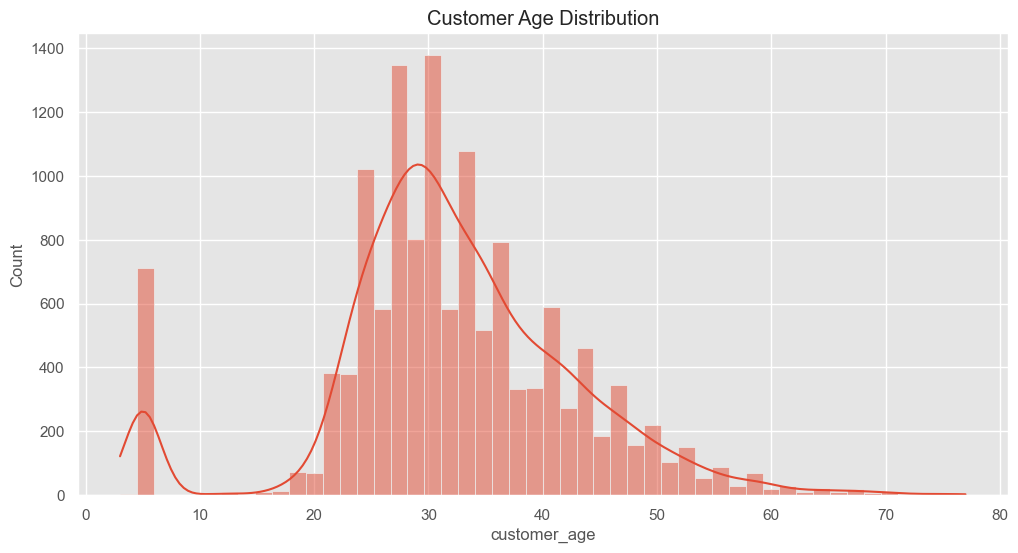

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_2['customer_age'], bins=50, kde=True)
plt.title("Customer Age Distribution")
plt.show()

**Veri temizlemesi ile orta yaş aralığı en çok alışveriş yapmıştır**

C:\Users\90534\AppData\Local\Temp\ipykernel_8868\4037190098.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2['customer_age'], shade=True)


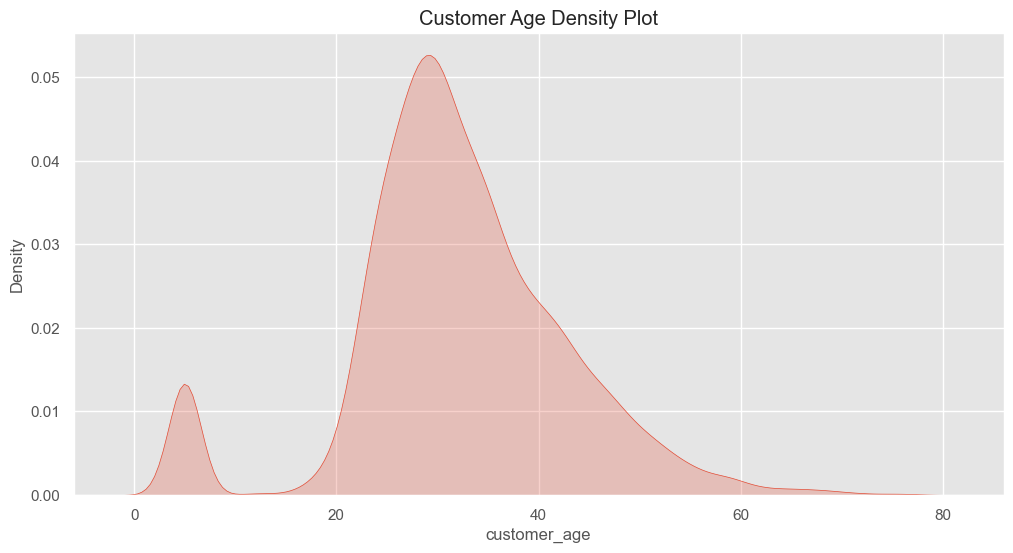

In [140]:
sns.kdeplot(df_2['customer_age'], shade=True)
plt.title("Customer Age Density Plot")
plt.show()

**Yaş yoğunluk haritası ile makine öğrenmesi algoritmalarında kullanılabilir**

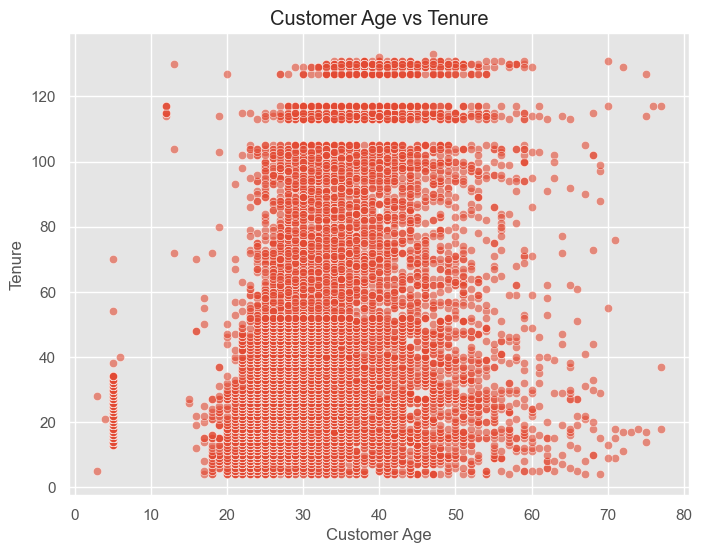

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='customer_age', y='tenure', data=df_2, alpha=0.6)
plt.title("Customer Age vs Tenure")
plt.xlabel("Customer Age")
plt.ylabel("Tenure")
plt.show()

**Orta-üstü yaş aralığı daha fazla vakit geçirmiştir**

In [151]:
import matplotlib.pyplot as plt

# Örnek DataFrame'ler
# df1 ve df2 diyelim, x ekseni olarak index kullanacağız
plt.figure(figsize=(100,100))

plt.scatter(df_1.index, df_1['customer_id'], color='blue', alpha=1, label='DF1')
plt.scatter(df_2.index, df_2['customer_id'], color='red', alpha=1, label='DF2')

plt.xlabel("Index")
plt.ylabel("Customer ID")
plt.title("İki DataFrame Customer ID Scatter")
plt.legend()
plt.show()


**Customer_id'ler data_1 'de ve data_2 'de farklı algoritmalarla verilmiştir.**

*Değişkenler Arası İnceleme (Korelasyon)*

              customer_id  product_id  basket_count
customer_id      1.000000    0.001937      0.058235
product_id       0.001937    1.000000     -0.006407
basket_count     0.058235   -0.006407      1.000000


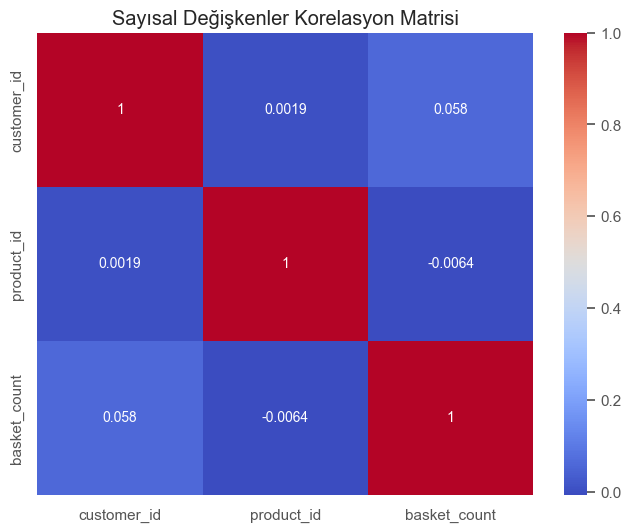

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal değişkenleri seç
numeric_cols = df_1.select_dtypes(include='number')

# Korelasyon matrisi
corr_matrix = numeric_cols.corr()
print(corr_matrix)

# Heatmap ile görselleştirme
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Sayısal Değişkenler Korelasyon Matrisi")
plt.show()


              customer_id  customer_age    tenure
customer_id      1.000000     -0.256142 -0.882827
customer_age    -0.256142      1.000000  0.318126
tenure          -0.882827      0.318126  1.000000


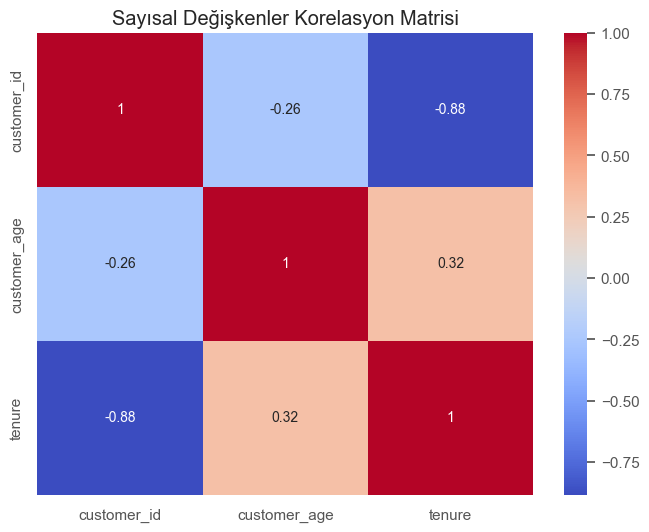

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal değişkenleri seç
numeric_cols = df_2.select_dtypes(include='number')

# Korelasyon matrisi
corr_matrix = numeric_cols.corr()
print(corr_matrix)

# Heatmap ile görselleştirme
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Sayısal Değişkenler Korelasyon Matrisi")
plt.show()

**Yaş etkeninin alışveriş yapmada zaman geçirmeye orta-alt derecede önemi var**

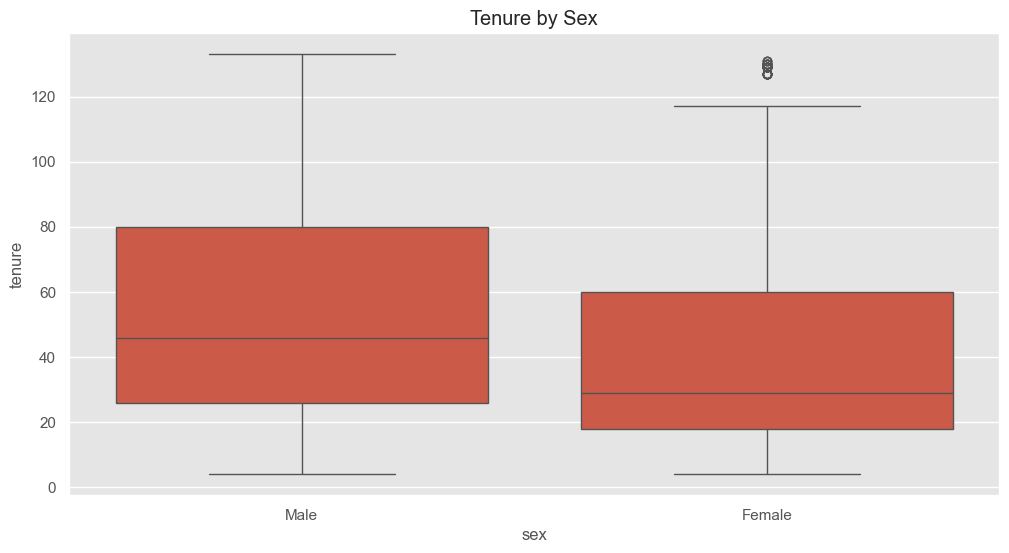

In [164]:
sns.boxplot(x='sex', y='tenure', data=df_2)
plt.title("Tenure by Sex")
plt.show()

**Her kategorinin dağılımı, medyan ve aykırı değerleri gösterir.**

*Kategorik Değişken Analizi*

In [156]:
df_2["sex"].value_counts()

sex
Male      10080
Female     3198
Name: count, dtype: int64

**Erkekler kadınlardan daha fazla alışveriş yapmıştır**

In [66]:
df_1["customer_id"].value_counts()

customer_id
11082470    8
8276934     8
18617678    6
15483576    5
10416769    5
           ..
6530468     1
26017064    1
42451678    1
12059341    1
15570161    1
Name: count, Length: 13871, dtype: int64

In [67]:
df_2["customer_id"].value_counts()

customer_id
12580211    1
12529237    1
12574807    1
12528327    1
12537037    1
           ..
12049009    1
10083045    1
11248447    1
819721      1
4713723     1
Name: count, Length: 20000, dtype: int64

In [161]:
customer_totals = df_1.groupby('customer_id')['basket_count'].sum()
max_customer_id = customer_totals.idxmax()
max_basket_count = customer_totals.max()
print(max_customer_id)
print(max_basket_count)

8276934
29


**8276934 ID'li kişi belirli tarihlerde 29 kez alışveriş yapmış**

-------

**Munich Weather Analysis**

In [203]:
data = pd.read_csv("D:\\Kütüphane\\Python\\Atölye Proje\\munich (1).csv")

In [171]:
data.head()

,time;precipitation_sum (mm);snowfall_sum (cm)
0,2024-03-01;NaN;NaN
1,2024-03-02;NaN;NaN
2,2024-03-03;NaN;NaN
3,2024-03-04;NaN;NaN
4,2024-03-05;NaN;NaN


In [205]:
data = pd.read_csv("D:\\Kütüphane\\Python\\Atölye Proje\\munich (1).csv" , sep = ";")

In [174]:
data.head()

,time,precipitation_sum (mm),snowfall_sum (cm)
0,2024-03-01,NaN,NaN
1,2024-03-02,NaN,NaN
2,2024-03-03,NaN,NaN
3,2024-03-04,NaN,NaN
4,2024-03-05,NaN,NaN


In [175]:
data["snowfall_sum (cm)"].unique()

array([ nan, 0.  , 0.01, 1.01, 0.56, 0.42, 0.49])

In [176]:
data["precipitation_sum (mm)"].unique()

array([ nan,  0. ,  7.9,  6.9,  4.9,  0.1,  8.3,  1.8,  2.3,  0.2,  5.3,
        1.7,  1.5,  0.9,  6.6,  5.4, 11.7,  9.5,  4.4,  9.1,  1.6,  0.4,
       38.6,  0.3,  9. ,  0.6,  7.1,  5.5,  2.2,  8.4,  3.4, 35.1, 10.2,
        1.4, 22.9, 23.2, 78.4,  2.8, 14. ,  0.8,  4.3, 13.8,  3.3,  0.7,
       11.2,  7.2,  3.2,  6.1,  7. ,  8.1,  9.4, 10.3,  1.1, 16. ,  2.1,
        4.1,  4.8,  4. ,  3.5])

In [177]:
data["time"].unique()

array(['2024-03-01', '2024-03-02', '2024-03-03', '2024-03-04',
       '2024-03-05', '2024-03-06', '2024-03-07', '2024-03-08',
       '2024-03-09', '2024-03-10', '2024-03-11', '2024-03-12',
       '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-16',
       '2024-03-17', '2024-03-18', '2024-03-19', '2024-03-20',
       '2024-03-21', '2024-03-22', '2024-03-23', '2024-03-24',
       '2024-03-25', '2024-03-26', '2024-03-27', '2024-03-28',
       '2024-03-29', '2024-03-30', '2024-03-31', '2024-04-01',
       '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05',
       '2024-04-06', '2024-04-07', '2024-04-08', '2024-04-09',
       '2024-04-10', '2024-04-11', '2024-04-12', '2024-04-13',
       '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17',
       '2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21',
       '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
       '2024-04-26', '2024-04-27', '2024-04-28', '2024-04-29',
       '2024-04-30', '2024-05-01', '2024-05-02', '2024-

In [178]:
data.isnull().sum()

time                       0
precipitation_sum (mm)    19
snowfall_sum (cm)         19
dtype: int64

In [179]:
data.head()

,time,precipitation_sum (mm),snowfall_sum (cm)
0,2024-03-01,NaN,NaN
1,2024-03-02,NaN,NaN
2,2024-03-03,NaN,NaN
3,2024-03-04,NaN,NaN
4,2024-03-05,NaN,NaN


*Eksik verileri istatiksel olarak doldurma*

In [191]:
# Ortalama ile doldurma

num_cols = ['precipitation_sum (mm)', 'snowfall_sum (cm)']
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())


In [192]:
data.head()

,time,precipitation_sum (mm),snowfall_sum (cm)
0,2024-03-01,3.926119,0.018582
1,2024-03-02,3.926119,0.018582
2,2024-03-03,3.926119,0.018582
3,2024-03-04,3.926119,0.018582
4,2024-03-05,3.926119,0.018582


In [ ]:
# Median ile doldurma
num_cols = ['precipitation_sum (mm)', 'snowfall_sum (cm)']
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

In [207]:
data.head()

,time,precipitation_sum (mm),snowfall_sum (cm)
0,2024-03-01,0.75,0.0
1,2024-03-02,0.75,0.0
2,2024-03-03,0.75,0.0
3,2024-03-04,0.75,0.0
4,2024-03-05,0.75,0.0


In [209]:
data["snowfall_sum (cm)"].unique()

array([0.  , 0.01, 1.01, 0.56, 0.42, 0.49])

In [210]:
data.describe()

,precipitation_sum (mm),snowfall_sum (cm)
count,153.000000,153.000000
mean,3.531699,0.016275
std,8.337985,0.106059
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.750000,0.000000
75%,4.100000,0.000000
max,78.400000,1.010000


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    153 non-null    object 
 1   precipitation_sum (mm)  153 non-null    float64
 2   snowfall_sum (cm)       153 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


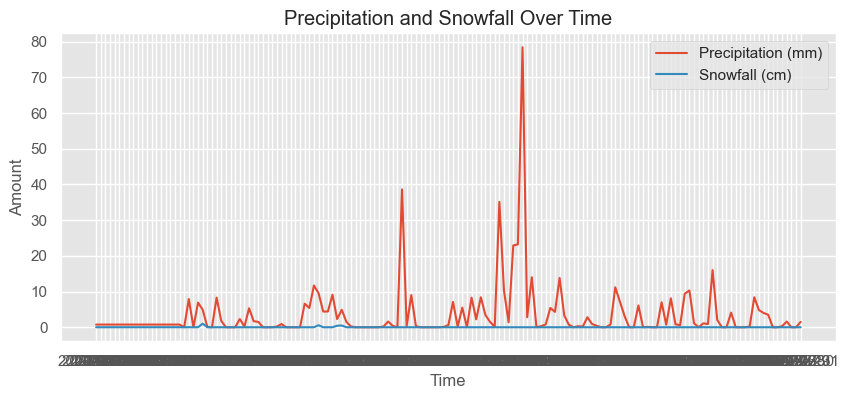

In [212]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(data['time'], data['precipitation_sum (mm)'], label='Precipitation (mm)')
plt.plot(data['time'], data['snowfall_sum (cm)'], label='Snowfall (cm)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Precipitation and Snowfall Over Time')
plt.legend()
plt.show()


*Grafiğe göre precipitation yani toplam yağış miktarı yeryüzüne düşen kar yani snowfall etkilememiştir*

In [213]:
import pandas as pd

# Sayısal kolonları seç
numeric_cols = ['precipitation_sum (mm)', 'snowfall_sum (cm)']

# Korelasyon matrisi
corr_matrix = data[numeric_cols].corr()
print(corr_matrix)

                        precipitation_sum (mm)  snowfall_sum (cm)
precipitation_sum (mm)                1.000000           0.036536
snowfall_sum (cm)                     0.036536           1.000000


*Korelasyon analizi ile görebiliriz*

------

**IMBD Movies Analysis**

In [235]:
df = pd.read_csv("D:\\Kütüphane\\Python\\Atölye Proje\\archive (5)\\movies_initial.csv")

In [219]:
df.head()

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
0,1,Carmencita,1894,NOT RATED,1 min,"Documentary, Short",NaN,William K.L. Dickson,NaN,Carmencita,NaN,5.9,1032.0,https://m.media-amazon.com/images/M/MV5BMjAzND...,Performing on what looks like a small wooden s...,Performing on what looks like a small wooden s...,NaN,USA,NaN,2015-08-26 00:03:45.040000000,movie
1,5,Blacksmith Scene,1893,UNRATED,1 min,Short,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",NaN,6.2,1189.0,NaN,Three men hammer on an anvil and pass a bottle...,A stationary camera looks at a large anvil wit...,NaN,USA,1 win.,2015-08-26 00:03:50.133000000,movie
2,3,Pauvre Pierrot,1892,NaN,4 min,"Animation, Comedy, Short",1892-10-28,�mile Reynaud,NaN,NaN,NaN,6.7,566.0,NaN,"One night, Arlequin come to see his lover Colo...","One night, Arlequin come to see his lover Colo...",NaN,France,NaN,2015-08-12 00:06:02.720000000,movie
3,8,Edison Kinetoscopic Record of a Sneeze,1894,NaN,1 min,"Documentary, Short",1894-01-09,William K.L. Dickson,NaN,Fred Ott,NaN,5.9,988.0,NaN,A man (Thomas Edison's assistant) takes a pinc...,A man (Edison's assistant) takes a pinch of sn...,NaN,USA,NaN,2015-08-10 00:21:07.127000000,movie
4,10,Employees Leaving the Lumi�re Factory,1895,NaN,1 min,"Documentary, Short",1895-03-22,Louis Lumi�re,NaN,NaN,NaN,6.9,3469.0,NaN,A man opens the big gates to the Lumi�re facto...,A man opens the big gates to the Lumi�re facto...,NaN,France,NaN,2015-08-26 00:03:56.603000000,movie


In [225]:
def extract_non_latin(text):
    if pd.isnull(text):
        return ''
    return ''.join(re.findall(r'[^a-zA-Z]', str(text)))

df['non_latin_chars'] = df['title'].apply(extract_non_latin)
print(df[['title','non_latin_chars']])

                                        title non_latin_chars
0                                  Carmencita                
1                            Blacksmith Scene                
2                              Pauvre Pierrot                
3      Edison Kinetoscopic Record of a Sneeze                
4       Employees Leaving the Lumi�re Factory              � 
...                                       ...             ...
46009                       The New Classmate                
46010      Untitled Christopher Nolan Project                
46011                  Die Turnschuh-Giganten               -
46012                The Monster of Mangatiti                
46013                           The Last Word                

[46014 rows x 2 columns]


In [226]:
df["non_latin_chars"].unique()

array(['', ' ', '     ', ..., '  2 -  � �', '   :   -      !', "'�   "],
      shape=(2727,), dtype=object)

In [228]:
df["non_latin_chars"].nunique()

2727

In [229]:
# 'title' sütununda sadece � karakteri geçen satırlar
only_invalid = df[df['title'].str.contains('�', na=False)]

print(only_invalid[['title']])

                                       title
4      Employees Leaving the Lumi�re Factory
9                        D�molition d'un mur
32                   Faust et M�phistoph�l�s
70                         Tr�dg�rdsm�staren
284       H�xan: Witchcraft Through the Ages
...                                      ...
45931       Les Tuches 2 - Le r�ve am�ricain
45933                             Ornit�logo
45958                        Hundra�ringen 2
45966          L'�tudiante et monsieur Henri
45972                              B�rning 2

[1008 rows x 1 columns]


In [236]:
df["rating"].unique()

array(['NOT RATED', 'UNRATED', nan, 'TV-G', 'G', 'TV-PG', 'PASSED',
       'APPROVED', 'Unrated', 'Not Rated', 'TV-14', 'PG', 'PG-13',
       'Approved', 'K-16', 'S', '18', 'M', 'E', 'R', 'GP', '(Banned)',
       'K-12', 'TV-MA', 'X', 'NC-17', 'AO', 'TV-Y7', '(BANNED)', 'K-11',
       'OPEN', 'K-15'], dtype=object)

In [237]:
df["runtime"].unique()

array(['1 min', '4 min', '3 min', '2 min', nan, '6 min', '10 min',
       '13 min', '8 min', '11 min', '16 min', '7 min', '24 min', '14 min',
       '17 min', '70 min', '9 min', '38 min', '12 min', '18 min',
       '88 min', '33 min', '15 min', '68 min', '55 min', '54 min',
       '96 min', '28 min', '61 min', '90 min', '85 min', '78 min',
       '29 min', '148 min', '52 min', '59 min', '84 min', '65 min',
       '27 min', '40 min', '199 min', '74 min', '67 min', '82 min',
       '25 min', '165 min', '20 min', '50 min', '31 min', '73 min',
       '77 min', '5 min', '100 min', '26 min', '34 min', '30 min',
       '46 min', '72 min', '399 min', '105 min', '60 min', '58 min',
       '64 min', '62 min', '300 min', '63 min', '197 min', '23 min',
       '112 min', '22 min', '87 min', '57 min', '48 min', '75 min',
       '80 min', '93 min', '45 min', '86 min', '47 min', '99 min',
       '71 min', '122 min', '166 min', '116 min', '130 min', '41 min',
       '167 min', '49 min', '106 min', '91 

In [247]:
df['runtime'] = df['runtime'].str.replace(' min', " ")

In [249]:
df['runtime'] = df['runtime'].str.replace(' h', " ")

In [250]:
df["runtime"].unique()

array(['1 ', '4 ', '3 ', '2 ', nan, '6 ', '10 ', '13 ', '8 ', '11 ',
       '16 ', '7 ', '24 ', '14 ', '17 ', '70 ', '9 ', '38 ', '12 ', '18 ',
       '88 ', '33 ', '15 ', '68 ', '55 ', '54 ', '96 ', '28 ', '61 ',
       '90 ', '85 ', '78 ', '29 ', '148 ', '52 ', '59 ', '84 ', '65 ',
       '27 ', '40 ', '199 ', '74 ', '67 ', '82 ', '25 ', '165 ', '20 ',
       '50 ', '31 ', '73 ', '77 ', '5 ', '100 ', '26 ', '34 ', '30 ',
       '46 ', '72 ', '399 ', '105 ', '60 ', '58 ', '64 ', '62 ', '300 ',
       '63 ', '197 ', '23 ', '112 ', '22 ', '87 ', '57 ', '48 ', '75 ',
       '80 ', '93 ', '45 ', '86 ', '47 ', '99 ', '71 ', '122 ', '166 ',
       '116 ', '130 ', '41 ', '167 ', '49 ', '106 ', '91 ', '115 ',
       '107 ', '19 ', '104 ', '145 ', '79 ', '117 ', '150 ', '21 ', '32 ',
       '89 ', '114 ', '35 ', '69 ', '119 ', '242 ', '110 ', '81 ', '125 ',
       '143 ', '137 ', '183 ', '133 ', '273 ', '124 ', '136 ', '66 ',
       '111 ', '141 ', '135 ', '95 ', '129 ', '94 ', '92 ', '123 ',


In [253]:
df["runtime"].isnull().sum()

np.int64(2637)

In [255]:
# 'runtime' sütununu sayıya çevir, hatalı değerleri NaN yap
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

In [256]:
num_cols = ['runtime']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [257]:
df["runtime"].unique()

array([  1.        ,   4.        ,   3.        ,   2.        ,
        97.14747065,   6.        ,  10.        ,  13.        ,
         8.        ,  11.        ,  16.        ,   7.        ,
        24.        ,  14.        ,  17.        ,  70.        ,
         9.        ,  38.        ,  12.        ,  18.        ,
        88.        ,  33.        ,  15.        ,  68.        ,
        55.        ,  54.        ,  96.        ,  28.        ,
        61.        ,  90.        ,  85.        ,  78.        ,
        29.        , 148.        ,  52.        ,  59.        ,
        84.        ,  65.        ,  27.        ,  40.        ,
       199.        ,  74.        ,  67.        ,  82.        ,
        25.        , 165.        ,  20.        ,  50.        ,
        31.        ,  73.        ,  77.        ,   5.        ,
       100.        ,  26.        ,  34.        ,  30.        ,
        46.        ,  72.        , 399.        , 105.        ,
        60.        ,  58.        ,  64.        ,  62.  

In [258]:
df["writer"].unique()

array([nan, 'Georges M�li�s', 'George L. Du Maurier (novel)', ...,
       'Nicolas Benamou, Fr�d�ric Jardin, Fabrice Roger-Lacan',
       'Christopher Nolan (screenplay), Christopher Nolan', 'John Banas'],
      shape=(36501,), dtype=object)

*Çok fazla object veri olduğu için NaN değerleri doldurmak işe yaramaz*

In [262]:
# imdbVotes sayısı string veya virgüllü olabilir → önce sayıya çevir
df['imdbVotes'] = df['imdbVotes'].replace(',', '', regex=True)  # ',' kaldır
df['imdbVotes'] = pd.to_numeric(df['imdbVotes'], errors='coerce')

# En çok oy alan film
most_votes = df.loc[df['imdbVotes'].idxmax()]
print("En çok oy alan film:")
print(most_votes[['title','imdbVotes','imdbRating']])

En çok oy alan film:
title         The Shawshank Redemption
imdbVotes                    1521105.0
imdbRating                         9.3
Name: 16727, dtype: object


In [263]:
import re

def count_awards(text):
    if pd.isna(text):
        return 0
    # Sadece rakamları topla
    numbers = re.findall(r'\d+', text)
    return sum(map(int, numbers))

df['total_awards'] = df['awards'].apply(count_awards)

# En çok ödül alan film
most_awards = df.loc[df['total_awards'].idxmax()]
print("\nEn çok ödül alan film:")
print(most_awards[['title','total_awards','awards']])


En çok ödül alan film:
title                                            12 Years a Slave
total_awards                                                  523
awards          Won 3 Oscars. Another 264 wins & 256 nominations.
Name: 38873, dtype: object


In [ ]:
# En yüksek imdbRating alan film
highest_rating = df.loc[df['imdbRating'].idxmax()]
print("\nEn yüksek rating alan film:")
print(highest_rating[['title','imdbRating','imdbVotes']])


En yüksek rating alan film:
title         Band of Brothers
imdbRating                 9.6
imdbVotes             183802.0
Name: 20963, dtype: object
